In [67]:
import numpy as np
import matplotlib.pyplot as plt

from ink_detection_utils import load_dataset

from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
VESUVIUS_DATA_PATH = '../../Datasets/vesuvius-challenge-ink-detection/'

layer_depth = 24

In [69]:
train_dataset = load_dataset(VESUVIUS_DATA_PATH, dataset = 'train')

Fragment: 1 Loaded: crop_100.png
Fragment: 1 Loaded: crop_1000.png
Fragment: 1 Loaded: crop_1001.png
Fragment: 1 Loaded: crop_1002.png
Fragment: 1 Loaded: crop_1003.png
Fragment: 1 Loaded: crop_1004.png
Fragment: 1 Loaded: crop_1005.png
Fragment: 1 Loaded: crop_1006.png
Fragment: 1 Loaded: crop_1007.png
Fragment: 1 Loaded: crop_1008.png
Fragment: 1 Loaded: crop_1009.png
Fragment: 1 Loaded: crop_101.png
Fragment: 1 Loaded: crop_1010.png
Fragment: 1 Loaded: crop_1011.png
Fragment: 1 Loaded: crop_1012.png
Fragment: 1 Loaded: crop_1013.png
Fragment: 1 Loaded: crop_102.png
Fragment: 1 Loaded: crop_1027.png
Fragment: 1 Loaded: crop_1028.png
Fragment: 1 Loaded: crop_1029.png
Fragment: 1 Loaded: crop_103.png
Fragment: 1 Loaded: crop_1030.png
Fragment: 1 Loaded: crop_1031.png
Fragment: 1 Loaded: crop_1032.png
Fragment: 1 Loaded: crop_1033.png
Fragment: 1 Loaded: crop_1034.png
Fragment: 1 Loaded: crop_1035.png
Fragment: 1 Loaded: crop_1036.png
Fragment: 1 Loaded: crop_1037.png
Fragment: 1 Loaded

In [81]:
train_dataset[0][0].shape

(1308, 65, 70, 70, 3)

In [106]:
train_dataset[0][1].shape

(1308, 70, 70, 3)

In [164]:
frag_1_volumes = train_dataset[0][0]
frag_1_labels = train_dataset[0][1]

frag_1_volumes = frag_1_volumes[:,:,:,:,0]
frag_1_labels = frag_1_labels[:,:,:,0]/255

In [165]:
frag_1_volumes.shape

(1308, 65, 70, 70)

In [166]:
frag_1_labels.shape

(1308, 70, 70)

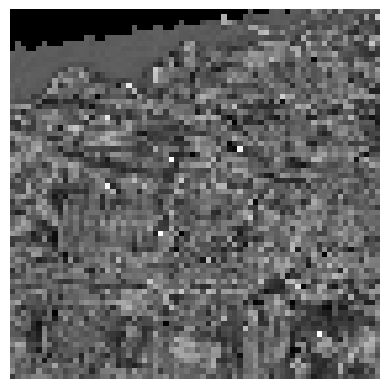

In [177]:
# Display the grayscale image
plt.imshow(frag_1_volumes[0][0], cmap="gray") #last [] is the layer
plt.axis("off")
plt.show()

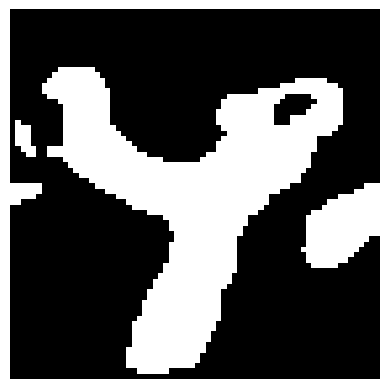

In [178]:
# Display the grayscale image
plt.imshow(frag_1_labels[0], cmap="gray")
plt.axis("off")
plt.show()

In [179]:
frag_1_volumes[0][0].shape

(70, 70)

In [180]:
frag_1_labels[0].shape

(70, 70)

In [181]:
frag_1_labels[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
frag_1_volumes = frag_1_volumes.reshape(frag_1_volumes.shape[0],frag_1_volumes.shape[1],1,70,70)
frag_1_labels = frag_1_labels.reshape(frag_1_volumes.shape[0],1,70,70)

In [183]:
#Do this processing for all fragments

for i in range(len(train_dataset)):
    train_dataset[i][0] = train_dataset[i][0][:,:,:,:,0]
    train_dataset[i][1] = train_dataset[i][1][:,:,:,0]/255

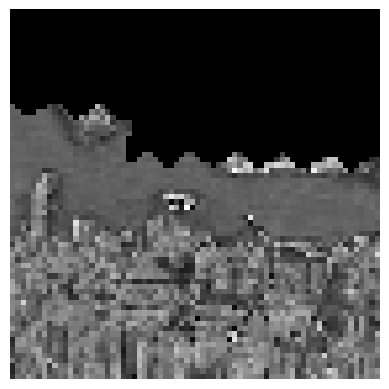

In [184]:
# Display the grayscale image
plt.imshow(train_dataset[1][0][0][0], cmap="gray") # [fragment][train][layer][image]
plt.axis("off")
plt.show()

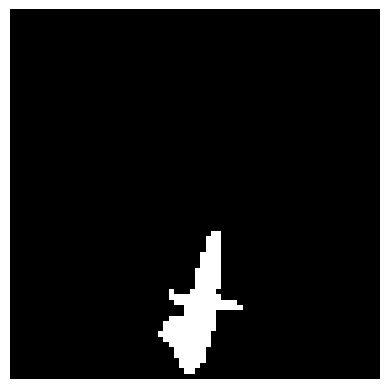

In [185]:
# Display the grayscale image
plt.imshow(train_dataset[1][1][0], cmap="gray") # [fragment][label][image]
plt.axis("off")
plt.show()

In [186]:
train_dataset[1][0][0][0].shape

(70, 70)

In [187]:
train_dataset[1][1][0].shape

(70, 70)

In [188]:
for i in range(len(train_dataset)):
    train_dataset[i][0] = train_dataset[i][0].reshape(train_dataset[i][0].shape[0],train_dataset[i][0].shape[1],1,70,70)
    train_dataset[i][1] = train_dataset[i][1].reshape(train_dataset[i][1].shape[0],1,70,70)

In [189]:
train_dataset[1][0][0][0].shape

(1, 70, 70)

In [190]:
train_dataset[1][1][0].shape

(1, 70, 70)

In [212]:
# Concatenate the arrays along the first dimension
volume_data = np.concatenate([arr[0] for arr in train_dataset], axis=0)
label_data = np.concatenate([arr[1] for arr in train_dataset], axis=0)

In [221]:
volume_data = volume_data[:,:layer_depth,:,:,:,]
volume_data.shape

(6938, 24, 1, 70, 70)

In [222]:
label_data.shape

(6938, 1, 70, 70)

In [223]:
# Test-train split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets while preserving label balance
X_train, X_val, Y_train, Y_val = train_test_split(volume_data, label_data, test_size=0.1)

In [224]:
print("Train images shape:",X_train.shape)
print("Train labels shape:",Y_train.shape)
print("Validation images shape:",X_val.shape)
print("Validation labels shape:",Y_val.shape)

Train images shape: (6244, 24, 1, 70, 70)
Train labels shape: (6244, 1, 70, 70)
Validation images shape: (694, 24, 1, 70, 70)
Validation labels shape: (694, 1, 70, 70)
